## Modeling Toolkit Experiments
Goal: create the simplest possible model involving vector variables and vector multiplication, using:
- MTK DSL
- MTK non-DSL
- Compare to DifferentialEquations

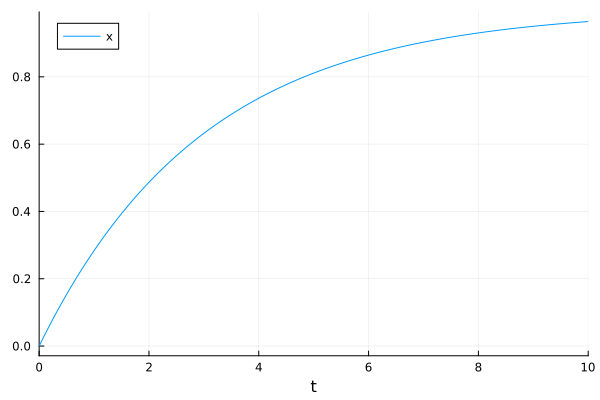

In [1]:
# Here is a general example of MTK Non-DSL from the Julia tutorial
using ModelingToolkit
using ModelingToolkit: t_nounits as t, D_nounits as D
@variables x(t) = 0.0  # independent and dependent variables
@parameters τ = 3.0       # parameters
@constants h = 1    # constants
eqs = [D(x) ~ (h - x) / τ] # create an array of equations

# your first ODE, consisting of a single equation, indicated by ~
@named model = ODESystem(eqs, t)

# Perform the standard transformations and mark the model complete
# Note: Complete models cannot be subsystems of other models!
fol = structural_simplify(model)
prob = ODEProblem(fol, [], (0.0, 10.0), [])
using OrdinaryDiffEq
sol = solve(prob)

using Plots
plot(sol)